# Install TensorFlow2 Object Detection Dependencies


In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
#utilize GPU in this project
#TPU configuration is recommended for faster training on larger dataset
!pip install -U --pre tensorflow_gpu=="2.2.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 516.3 MB 3.5 kB/s 
     |████████████████████████████████| 26.0 MB 1.3 MB/s 
     |████████████████████████████████| 2.9 MB 43.8 MB/s 
     |████████████████████████████████| 3.0 MB 41.2 MB/s 
     |████████████████████████████████| 454 kB 49.9 MB/s 
     |████████████████████████████████| 152 kB 51.5 MB/s 
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.2.0
    Uninstalling cachetools-5.2.0:
      Successfully uninstalled cachetools-5.2.0
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.15.0
    Uninstalling google-auth-2.15.0:
      Successfully uninstalled google-auth-2.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
 

In [ ]:
!git config --global http.postBuffer 157286400

In [ ]:
! pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import opendatasets as od
from keras_preprocessing.image import ImageDataGenerator
import imageio as iio
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image as img
from IPython.display import Image, display
import json
import os
from os import path
import pathlib
from pathlib import Path

In [ ]:
# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 3590, done.
remote: Counting objects: 100% (3590/3590), done.
remote: Compressing objects: 100% (3000/3000), done.
remote: Total 3590 (delta 944), reused 1521 (delta 536), pack-reused 0
Receiving objects: 100% (3590/3590), 47.08 MiB | 26.09 MiB/s, done.
Resolving deltas: 100% (944/944), done.


In [ ]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1696518 sha256=7362a33ec54336dce613ca36759692acd845629e224e0cf17a29b66fba95dba3
  Stored in directory: /tmp/pip-ephem-wheel-cache-39dq0elz/wheels/7d/96/c1/072a751379735e8dfdada1def1c62a89afb3cc45654fd6fd28
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78544 sha256=7042a02bf92b52cb35301ad7ec0701590c1453031773765e257aa74c6ac01fa8
  Stored in directory: /root/.cache/pip/wheels/07/35/78/e9004fa30578734db7f10e7a211605f3f0778d2bdde38a239d
  Created wheel for avro-python3: filename=avro_python3-1.10.2-py3-none-any.whl size=44009 sha256=04d44ee92610b2bf04ba14eaebea5e7f07530051268b214e41053b4ba56b1e08
  Stored in directory: /root/.cache/pip/wheels/bb/73/e9/d273421f5723c4bf544dcf9eb097bda94421ef8d3252699f0a
  Created wheel for docopt: filename=docopt-

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.2.0 requires tensorboard<2.3.0,>=2.2.0, but you have tensorboard 2.11.0 which is incompatible.
tensorflow-gpu 2.2.0 requires tensorflow-estimator<2.3.0,>=2.2.0, but you have tensorflow-estimator 2.11.0 which is incompatible.


In [ ]:
#run model builder test
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

2022-12-15 14:52:09.153426: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-15 14:52:10.627238: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-12-15 14:52:10.627505: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
od.download("https://www.kaggle.com/datasets/diyer22/retail-product-checkout-dataset")

100%|██████████| 25.3G/25.3G [04:57<00:00, 91.3MB/s]


In [ ]:
#Define train and test directories
dataset_dir = "/content/retail-product-checkout-dataset"

train_dir = dataset_dir + "/" + "train2019"
test_dir = dataset_dir + "/" + "test2019"
valid_dir = dataset_dir + "/" + "val2019"

train_dir, test_dir, valid_dir

('/content/retail-product-checkout-dataset/train2019',
 '/content/retail-product-checkout-dataset/test2019',
 '/content/retail-product-checkout-dataset/val2019')

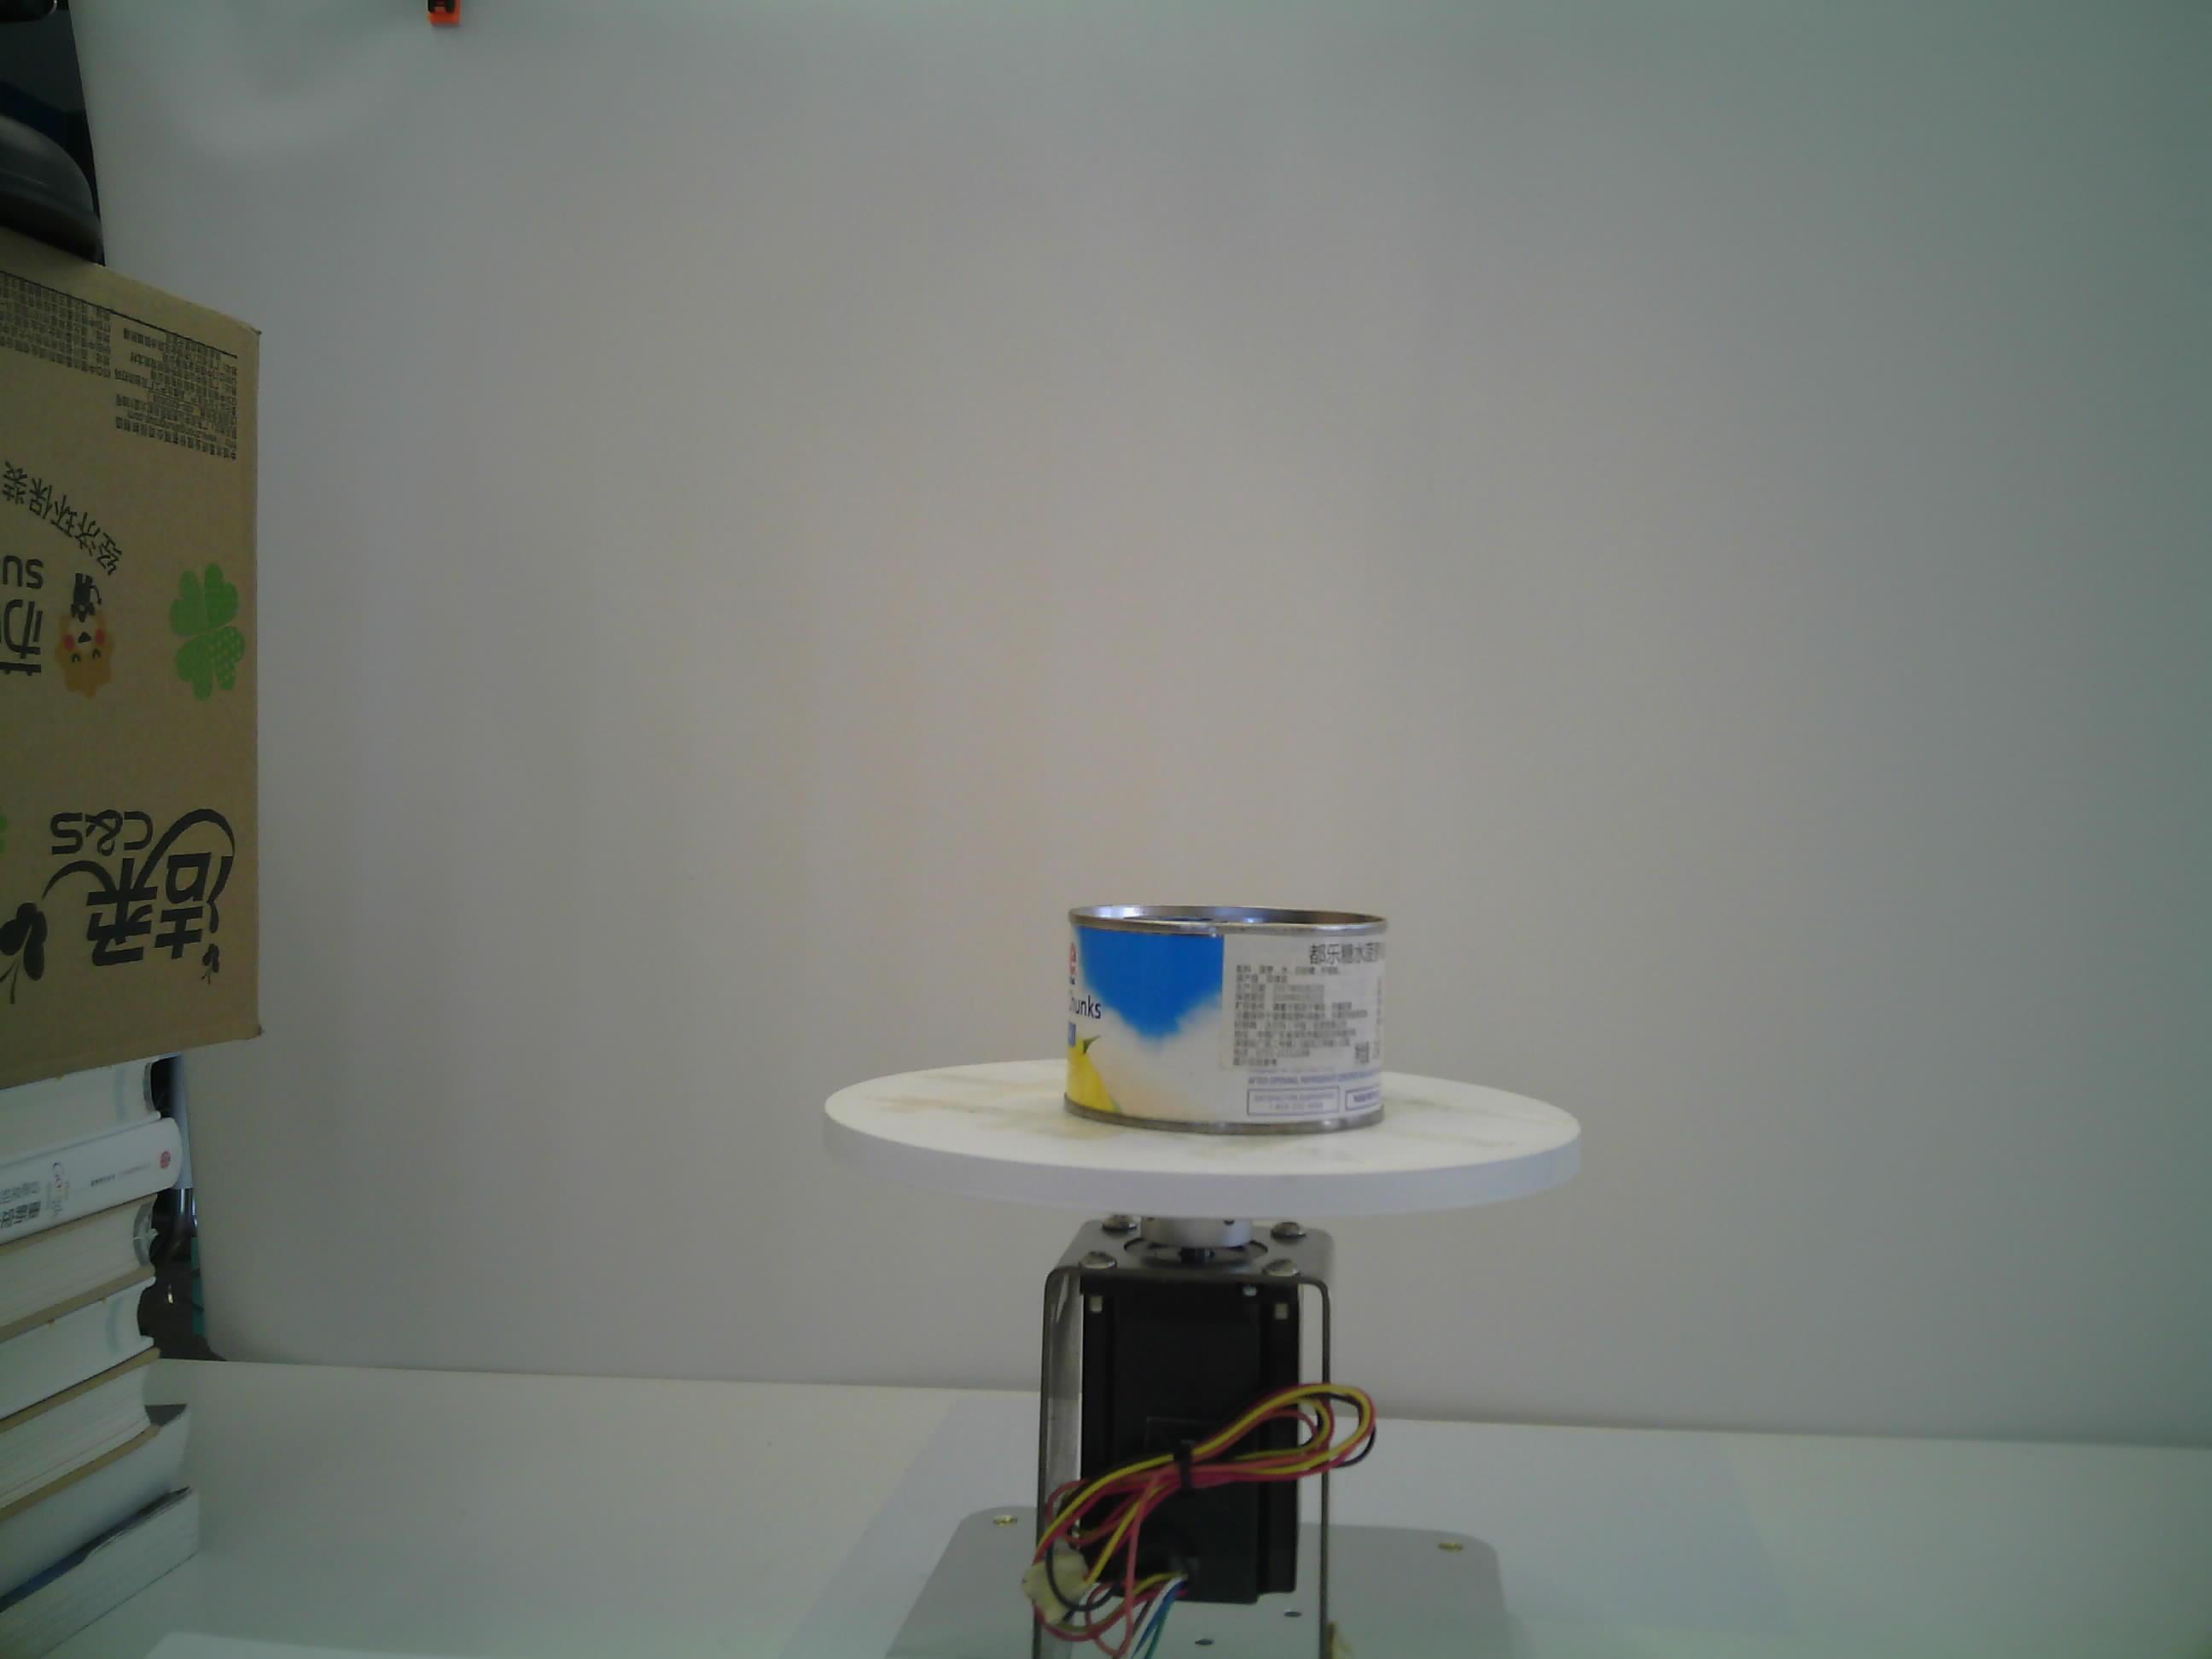

In [ ]:
img = cv2.imread('/content/retail-product-checkout-dataset/train2019/038900004095_camera0-22.jpg')
cv2_imshow(img)

In [ ]:
img_file = '/content/retail-product-checkout-dataset/test2019/20180824-17-19-50-542.jpg'

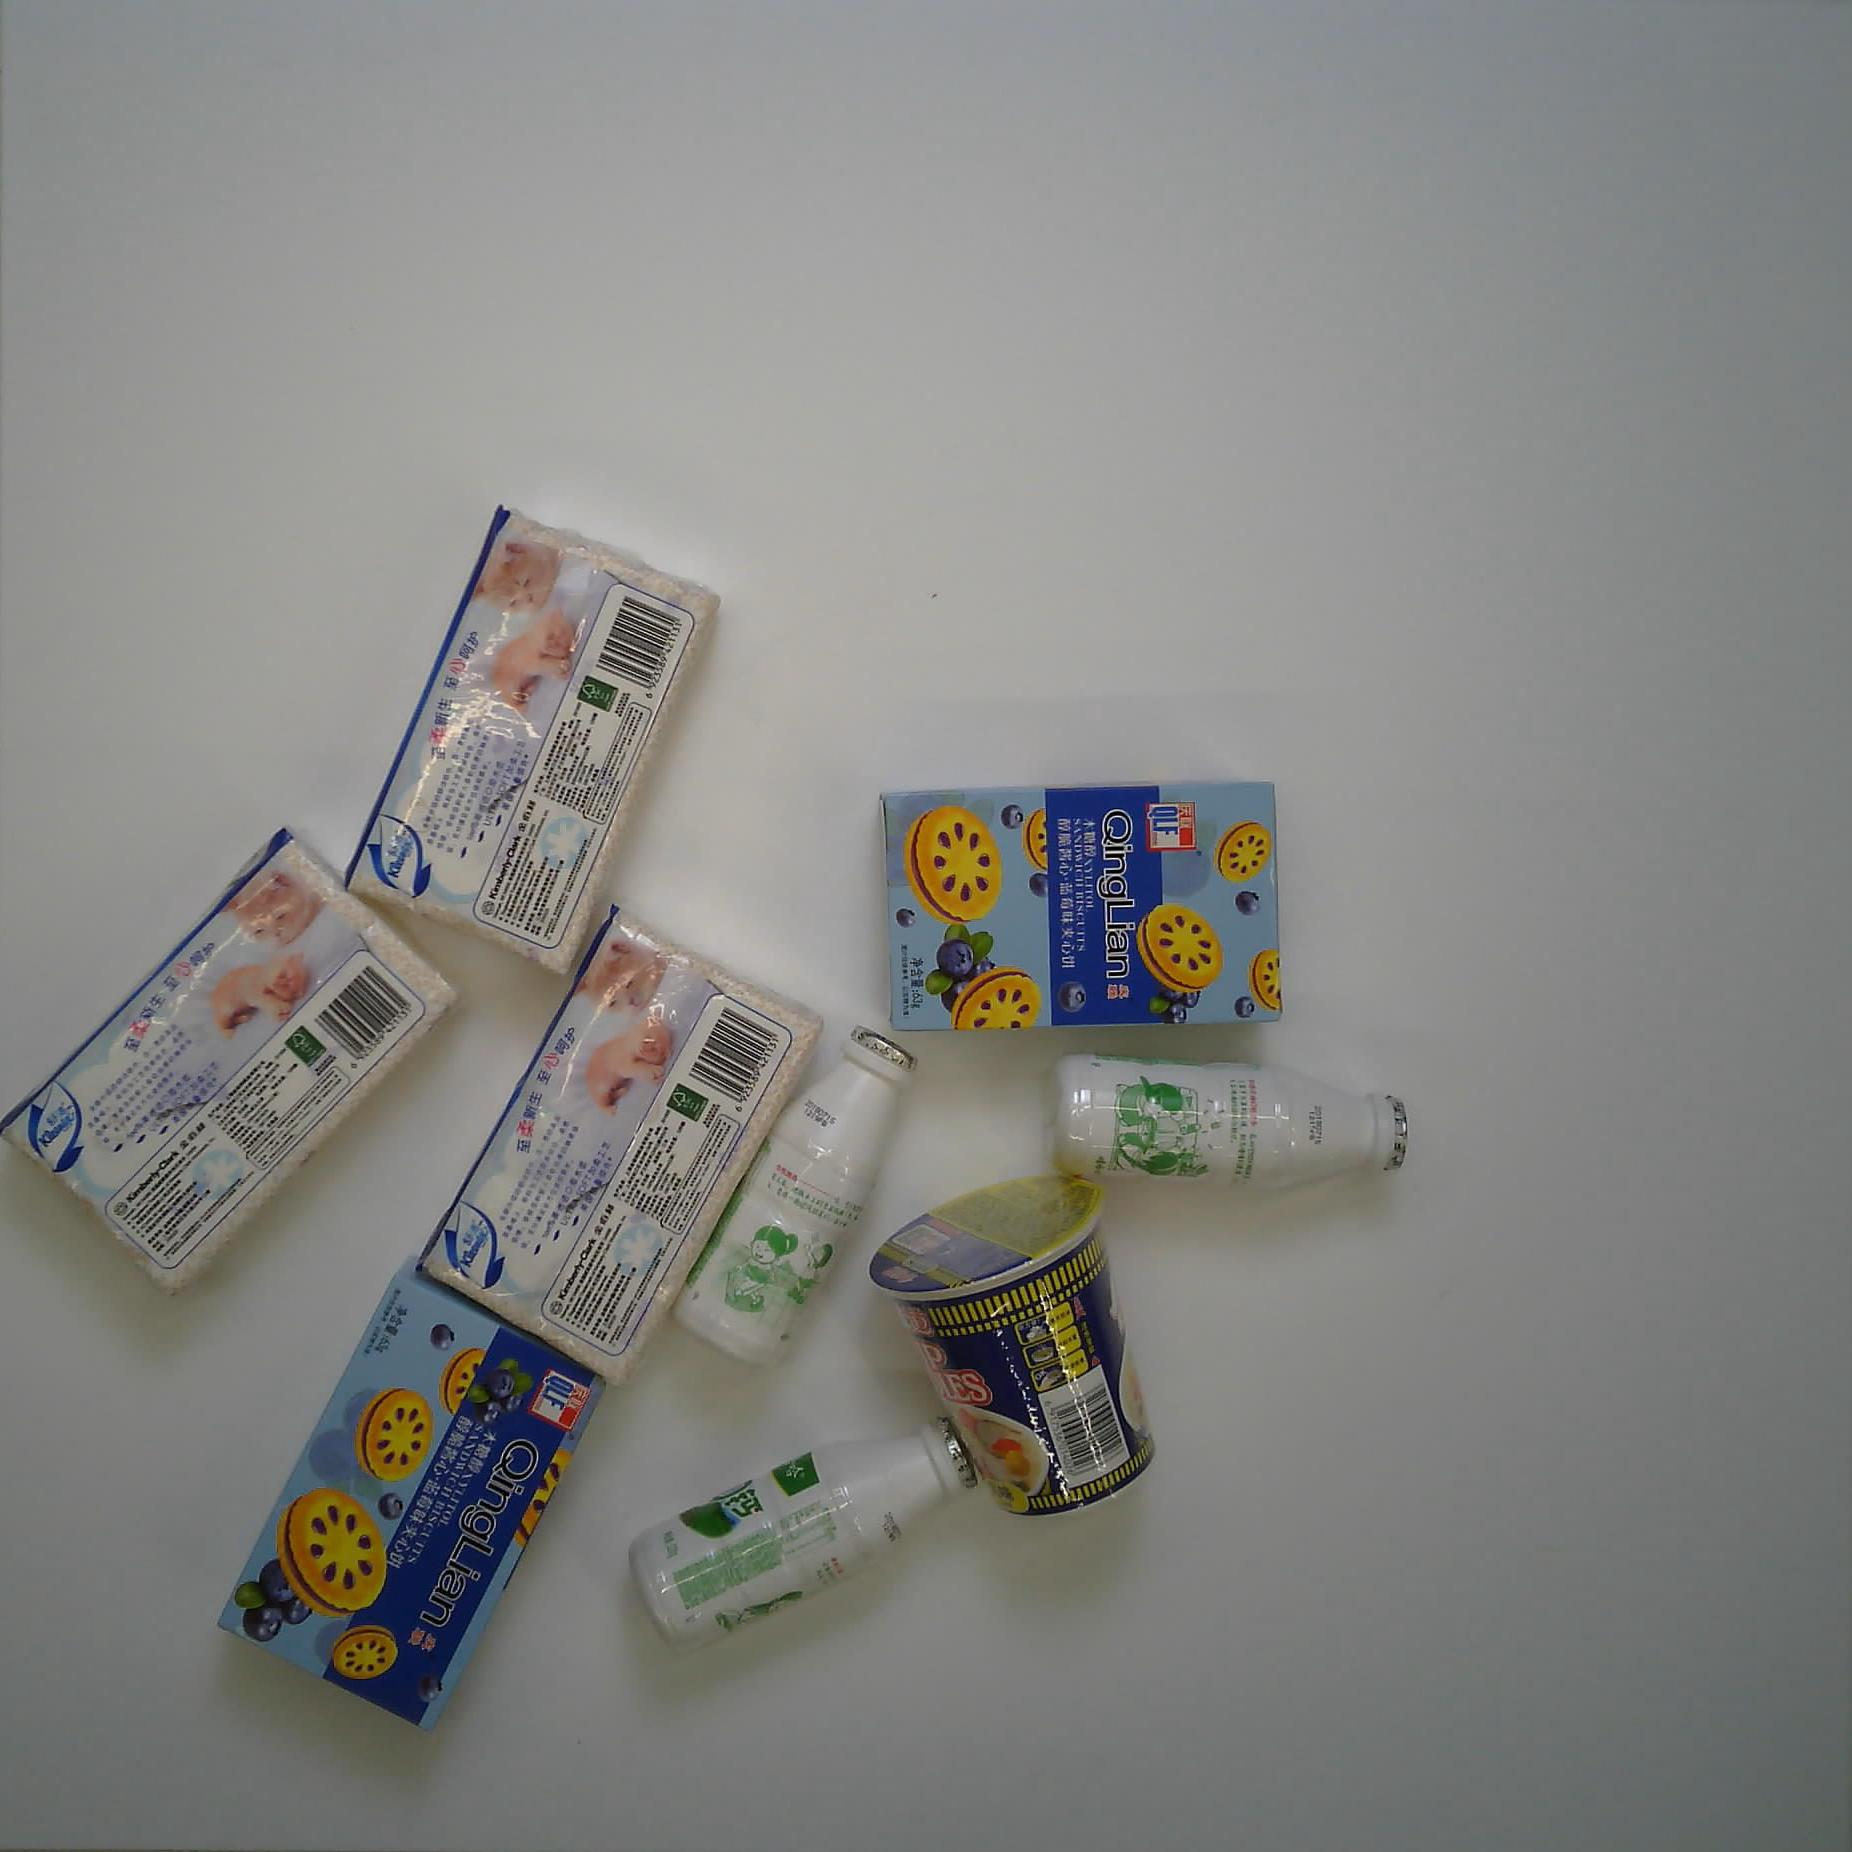

In [ ]:
display(Image(img_file))

In [ ]:
file = open('/content/retail-product-checkout-dataset/instances_train2019.json')
annot = json.load(file)
annot.keys()

dict_keys(['info', 'licenses', 'categories', '__raw_Chinese_name_df', 'images', 'annotations'])

In [ ]:
!pip install boxx > .null
# Loading annotation files
import boxx
train_js = boxx.loadjson('./retail-product-checkout-dataset/instances_train2019.json')
val_js = boxx.loadjson('./retail-product-checkout-dataset/instances_val2019.json')
test_js = boxx.loadjson('./retail-product-checkout-dataset/instances_test2019.json')

In [ ]:
boxx.tree(train_js, deep=1)

└── /: dict  6
    ├── info: dict  7
    ├── licenses: list  1
    ├── categories: list  200
    ├── __raw_Chinese_name_df: list  200
    ├── images: list  53739
    └── annotations: list  53739


In [ ]:
# Visualization struct of instances_train2019.json
from pprint import pprint
pprint(train_js["annotations"][0])

{'area': 111763.29,
 'bbox': [1188.4, 1052.45, 390.96, 285.87],
 'category_id': 112,
 'id': 0,
 'image_id': 0,
 'iscrowd': 0,
 'point_xy': [1383.88, 1195.38],
 'segmentation': [[]]}


In [ ]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path.

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

def plot_detections(image_np,
                    boxes,
                    classes,
                    scores,
                    category_index,
                    figsize=(12, 16),
                    image_name=None):
  """Wrapper function to visualize detections.

  Args:
    image_np: uint8 numpy array with shape (img_height, img_width, 3)
    boxes: a numpy array of shape [N, 4]
    classes: a numpy array of shape [N]. Note that class indices are 1-based,
      and match the keys in the label map.
    scores: a numpy array of shape [N] or None.  If scores=None, then
      this function assumes that the boxes to be plotted are groundtruth
      boxes and plot all boxes as black with no classes or scores.
    category_index: a dict containing category dictionaries (each holding
      category index `id` and category name `name`) keyed by category indices.
    figsize: size for the figure.
    image_name: a name for the image file.
  """
  image_np_with_annotations = image_np.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_annotations,
      boxes,
      classes,
      scores,
      category_index,
      use_normalized_coordinates=True,
      min_score_thresh=0.8)
  if image_name:
    plt.imsave(image_name, image_np_with_annotations)
  else:
    plt.imshow(image_np_with_annotations)

# Prepare Tensorflow 2 Object Detection Training Data


# Configure Custom TensorFlow2 Object Detection Training Configuration


In [ ]:
##change chosen model to deploy different models available in the TF2 object detection zoo
MODELS_CONFIG = {
    'efficientdet-d0': {
        'model_name': 'efficientdet_d0_coco17_tpu-32',
        'base_pipeline_file': 'ssd_efficientdet_d0_512x512_coco17_tpu-8.config',
        'pretrained_checkpoint': 'efficientdet_d0_coco17_tpu-32.tar.gz',
        'batch_size': 16
    },
    'efficientdet-d1': {
        'model_name': 'efficientdet_d1_coco17_tpu-32',
        'base_pipeline_file': 'ssd_efficientdet_d1_640x640_coco17_tpu-8.config',
        'pretrained_checkpoint': 'efficientdet_d1_coco17_tpu-32.tar.gz',
        'batch_size': 16
    },
    'efficientdet-d2': {
        'model_name': 'efficientdet_d2_coco17_tpu-32',
        'base_pipeline_file': 'ssd_efficientdet_d2_768x768_coco17_tpu-8.config',
        'pretrained_checkpoint': 'efficientdet_d2_coco17_tpu-32.tar.gz',
        'batch_size': 16
    },
        'efficientdet-d3': {
        'model_name': 'efficientdet_d3_coco17_tpu-32',
        'base_pipeline_file': 'ssd_efficientdet_d3_896x896_coco17_tpu-32.config',
        'pretrained_checkpoint': 'efficientdet_d3_coco17_tpu-32.tar.gz',
        'batch_size': 16
    }
}

#in this tutorial we implement the lightweight, smallest state of the art efficientdet model
#if you want to scale up tot larger efficientdet models you will likely need more compute!
chosen_model = 'efficientdet-d0'

num_steps = 40000 #The more steps, the longer the training. Increase if your loss function is still decreasing and validation metrics are increasing. 
num_eval_steps = 500 #Perform evaluation after so many steps

model_name = MODELS_CONFIG[chosen_model]['model_name']
pretrained_checkpoint = MODELS_CONFIG[chosen_model]['pretrained_checkpoint']
base_pipeline_file = MODELS_CONFIG[chosen_model]['base_pipeline_file']
batch_size = MODELS_CONFIG[chosen_model]['batch_size'] #if you can fit a large batch in memory, it may speed up your training

In [ ]:
#download pretrained weights
%mkdir /content/models/research/deploy/
%cd /content/models/research/deploy/
import tarfile
download_tar = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/' + pretrained_checkpoint

!wget {download_tar}
tar = tarfile.open(pretrained_checkpoint)
tar.extractall()
tar.close()

/content/models/research/deploy
--2022-12-15 15:05:20--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.2.128, 2607:f8b0:4023:c0d::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.2.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30736482 (29M) [application/x-tar]
Saving to: ‘efficientdet_d0_coco17_tpu-32.tar.gz’

efficientdet_d0_coc 100%[===================>]  29.31M  86.7MB/s    in 0.3s    

2022-12-15 15:05:21 (86.7 MB/s) - ‘efficientdet_d0_coco17_tpu-32.tar.gz’ saved [30736482/30736482]



In [ ]:
#download base training configuration file
%cd /content/models/research/deploy
download_config = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/' + base_pipeline_file
!wget {download_config}

/content/models/research/deploy
--2022-12-15 15:05:22--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_efficientdet_d0_512x512_coco17_tpu-8.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4630 (4.5K) [text/plain]
Saving to: ‘ssd_efficientdet_d0_512x512_coco17_tpu-8.config’

ssd_efficientdet_d0 100%[===================>]   4.52K  --.-KB/s    in 0s      

2022-12-15 15:05:22 (46.8 MB/s) - ‘ssd_efficientdet_d0_512x512_coco17_tpu-8.config’ saved [4630/4630]



In [ ]:
# NOTE: Update these TFRecord names from "cells" and "cells_label_map" to your files!
dataset_dir = "/content/retail-product-checkout-dataset"
trainfile = dataset_dir + '/train2019'
valfile = dataset_dir + '/val2019'
testfile = dataset_dir + '/test2019'

trainjson = dataset_dir + '/instances_train2019.json'
valjson = dataset_dir + '/instances_val2019.json'
testjson = dataset_dir + '/instances_test2019.json'

In [ ]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)
!pip install pylabel > /dev/null

In [ ]:
from pylabel import importer
from sklearn.model_selection import GroupShuffleSplit as sklearnGroupShuffleSplit
from pylabel.shared import schema

In [ ]:
#Specify path to the instances_train2019.json file
path_to_annotations = trainjson
#Specify the path to the images (if they are in a different folder than the annotations)
path_to_images = trainfile

In [ ]:
#Import the dataset into the pylable schema 
dataset = importer.ImportCoco(path_to_annotations, path_to_images=path_to_images, name="RPC")
dataset.df.head(5)

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,/content/retail-product-checkout-dataset/train...,038900004095_camera0-13.jpg,,0,2592,1944,,,1188.40,1052.45,...,[[]],0,,,,112,112_canned_food,canned_food,,1
1,/content/retail-product-checkout-dataset/train...,038900004095_camera0-18.jpg,,1,2592,1944,,,1214.89,1053.72,...,[[]],0,,,,112,112_canned_food,canned_food,,1
2,/content/retail-product-checkout-dataset/train...,038900004095_camera0-11.jpg,,2,2592,1944,,,1180.52,1055.31,...,[[]],0,,,,112,112_canned_food,canned_food,,1
3,/content/retail-product-checkout-dataset/train...,038900004095_camera0-10.jpg,,3,2592,1944,,,1171.68,1047.60,...,[[]],0,,,,112,112_canned_food,canned_food,,1
4,/content/retail-product-checkout-dataset/train...,038900004095_camera0-17.jpg,,4,2592,1944,,,1197.98,1052.86,...,[[]],0,,,,112,112_canned_food,canned_food,,1


In [ ]:
#Specify path to the instances_test2019.json file
path_to_annotations1 = testjson
#Specify the path to the images (if they are in a different folder than the annotations)
path_to_images1 = testfile

In [ ]:
#Import the dataset into the pylabel schema 
dataset1 = importer.ImportCoco(path_to_annotations, path_to_images=path_to_images1, name="RPC")
dataset1.df.head(5)

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,/content/retail-product-checkout-dataset/test2019,038900004095_camera0-13.jpg,,0,2592,1944,,,1188.40,1052.45,...,[[]],0,,,,112,112_canned_food,canned_food,,1
1,/content/retail-product-checkout-dataset/test2019,038900004095_camera0-18.jpg,,1,2592,1944,,,1214.89,1053.72,...,[[]],0,,,,112,112_canned_food,canned_food,,1
2,/content/retail-product-checkout-dataset/test2019,038900004095_camera0-11.jpg,,2,2592,1944,,,1180.52,1055.31,...,[[]],0,,,,112,112_canned_food,canned_food,,1
3,/content/retail-product-checkout-dataset/test2019,038900004095_camera0-10.jpg,,3,2592,1944,,,1171.68,1047.60,...,[[]],0,,,,112,112_canned_food,canned_food,,1
4,/content/retail-product-checkout-dataset/test2019,038900004095_camera0-17.jpg,,4,2592,1944,,,1197.98,1052.86,...,[[]],0,,,,112,112_canned_food,canned_food,,1


In [ ]:
#PyLabel imports the annotations into a pandas dataframe. Now you can filter this dataframe to the rows related to the images that you care about. There are 364 images in this dataset
print(f"Number of images: {dataset.analyze.num_images}")


Number of images: 53739


In [ ]:
#PyLabel imports the annotations into a pandas dataframe. Now you can filter this dataframe to the rows related to the images that you care about. There are 364 images in this dataset
print(f"Number of images: {dataset1.analyze.num_images}")

Number of images: 53739


In [ ]:
print(f"Number of classes: {dataset.analyze.num_classes}")

Number of classes: 200


In [ ]:
print(f"Number of classes: {dataset1.analyze.num_classes}")

Number of classes: 200


In [ ]:
print(f"Mapping Classing with name Id: {dataset.analyze.class_name_id_map}")

Mapping Classing with name Id: {'112_canned_food': '112', '111_canned_food': '111', '103_milk': '103', '87_drink': '87', '92_alcohol': '92', '172_personal_hygiene': '172', '120_canned_food': '120', '177_tissue': '177', '72_drink': '72', '148_candy': '148', '70_dessert': '70', '194_stationery': '194', '158_seasoner': '158', '63_dessert': '63', '62_dessert': '62', '2_puffed_food': '2', '141_gum': '141', '153_seasoner': '153', '168_personal_hygiene': '168', '99_milk': '99', '167_personal_hygiene': '167', '118_canned_food': '118', '58_dessert': '58', '59_dessert': '59', '165_personal_hygiene': '165', '182_tissue': '182', '90_alcohol': '90', '164_personal_hygiene': '164', '24_dried_food': '24', '15_dried_fruit': '15', '25_dried_food': '25', '28_dried_food': '28', '18_dried_fruit': '18', '156_seasoner': '156', '157_seasoner': '157', '16_dried_fruit': '16', '105_milk': '105', '27_dried_food': '27', '14_dried_fruit': '14', '17_dried_fruit': '17', '23_dried_food': '23', '21_dried_fruit': '21', 

In [ ]:
print(f"Mapping Classing with name Id: {dataset1.analyze.class_name_id_map}")

Mapping Classing with name Id: {'112_canned_food': '112', '111_canned_food': '111', '103_milk': '103', '87_drink': '87', '92_alcohol': '92', '172_personal_hygiene': '172', '120_canned_food': '120', '177_tissue': '177', '72_drink': '72', '148_candy': '148', '70_dessert': '70', '194_stationery': '194', '158_seasoner': '158', '63_dessert': '63', '62_dessert': '62', '2_puffed_food': '2', '141_gum': '141', '153_seasoner': '153', '168_personal_hygiene': '168', '99_milk': '99', '167_personal_hygiene': '167', '118_canned_food': '118', '58_dessert': '58', '59_dessert': '59', '165_personal_hygiene': '165', '182_tissue': '182', '90_alcohol': '90', '164_personal_hygiene': '164', '24_dried_food': '24', '15_dried_fruit': '15', '25_dried_food': '25', '28_dried_food': '28', '18_dried_fruit': '18', '156_seasoner': '156', '157_seasoner': '157', '16_dried_fruit': '16', '105_milk': '105', '27_dried_food': '27', '14_dried_fruit': '14', '17_dried_fruit': '17', '23_dried_food': '23', '21_dried_fruit': '21', 

In [ ]:
print(f"Class counts:\n{dataset.analyze.class_counts}")

Class counts:
173_personal_hygiene    640
197_stationery          640
190_tissue              640
196_stationery          640
131_chocolate           640
                       ... 
114_canned_food         160
109_canned_food         160
117_canned_food         160
94_alcohol              159
112_canned_food         158
Name: cat_name, Length: 200, dtype: int64


In [ ]:
print(f"Class counts:\n{dataset1.analyze.class_counts}")

Class counts:
173_personal_hygiene    640
197_stationery          640
190_tissue              640
196_stationery          640
131_chocolate           640
                       ... 
114_canned_food         160
109_canned_food         160
117_canned_food         160
94_alcohol              159
112_canned_food         158
Name: cat_name, Length: 200, dtype: int64


In [ ]:
print(f"Class Splits:\n{dataset.analyze.ShowClassSplits(True)}")

Class Splits:
                           all
cat_name                      
173_personal_hygiene  0.011909
197_stationery        0.011909
190_tissue            0.011909
196_stationery        0.011909
131_chocolate         0.011909
...                        ...
114_canned_food       0.002977
109_canned_food       0.002977
117_canned_food       0.002977
94_alcohol            0.002959
112_canned_food       0.002940

[200 rows x 1 columns]


In [ ]:
print(f"Class Splits:\n{dataset1.analyze.ShowClassSplits(True)}")

Class Splits:
                           all
cat_name                      
173_personal_hygiene  0.011909
197_stationery        0.011909
190_tissue            0.011909
196_stationery        0.011909
131_chocolate         0.011909
...                        ...
114_canned_food       0.002977
109_canned_food       0.002977
117_canned_food       0.002977
94_alcohol            0.002959
112_canned_food       0.002940

[200 rows x 1 columns]


In [ ]:
print(f"Class counts:\n{dataset.analyze.classes}")

Class counts:
['1_puffed_food', '2_puffed_food', '3_puffed_food', '4_puffed_food', '5_puffed_food', '6_puffed_food', '7_puffed_food', '8_puffed_food', '9_puffed_food', '10_puffed_food', '11_puffed_food', '12_puffed_food', '13_dried_fruit', '14_dried_fruit', '15_dried_fruit', '16_dried_fruit', '17_dried_fruit', '18_dried_fruit', '19_dried_fruit', '20_dried_fruit', '21_dried_fruit', '22_dried_food', '23_dried_food', '24_dried_food', '25_dried_food', '26_dried_food', '27_dried_food', '28_dried_food', '29_dried_food', '30_dried_food', '31_instant_drink', '32_instant_drink', '33_instant_drink', '34_instant_drink', '35_instant_drink', '36_instant_drink', '37_instant_drink', '38_instant_drink', '39_instant_drink', '40_instant_drink', '41_instant_drink', '42_instant_noodles', '43_instant_noodles', '44_instant_noodles', '45_instant_noodles', '46_instant_noodles', '47_instant_noodles', '48_instant_noodles', '49_instant_noodles', '50_instant_noodles', '51_instant_noodles', '52_instant_noodles', '

In [ ]:
print(f"Class counts:\n{dataset1.analyze.classes}")

Class counts:
['1_puffed_food', '2_puffed_food', '3_puffed_food', '4_puffed_food', '5_puffed_food', '6_puffed_food', '7_puffed_food', '8_puffed_food', '9_puffed_food', '10_puffed_food', '11_puffed_food', '12_puffed_food', '13_dried_fruit', '14_dried_fruit', '15_dried_fruit', '16_dried_fruit', '17_dried_fruit', '18_dried_fruit', '19_dried_fruit', '20_dried_fruit', '21_dried_fruit', '22_dried_food', '23_dried_food', '24_dried_food', '25_dried_food', '26_dried_food', '27_dried_food', '28_dried_food', '29_dried_food', '30_dried_food', '31_instant_drink', '32_instant_drink', '33_instant_drink', '34_instant_drink', '35_instant_drink', '36_instant_drink', '37_instant_drink', '38_instant_drink', '39_instant_drink', '40_instant_drink', '41_instant_drink', '42_instant_noodles', '43_instant_noodles', '44_instant_noodles', '45_instant_noodles', '46_instant_noodles', '47_instant_noodles', '48_instant_noodles', '49_instant_noodles', '50_instant_noodles', '51_instant_noodles', '52_instant_noodles', '

In [ ]:
from IPython.display import Image, display

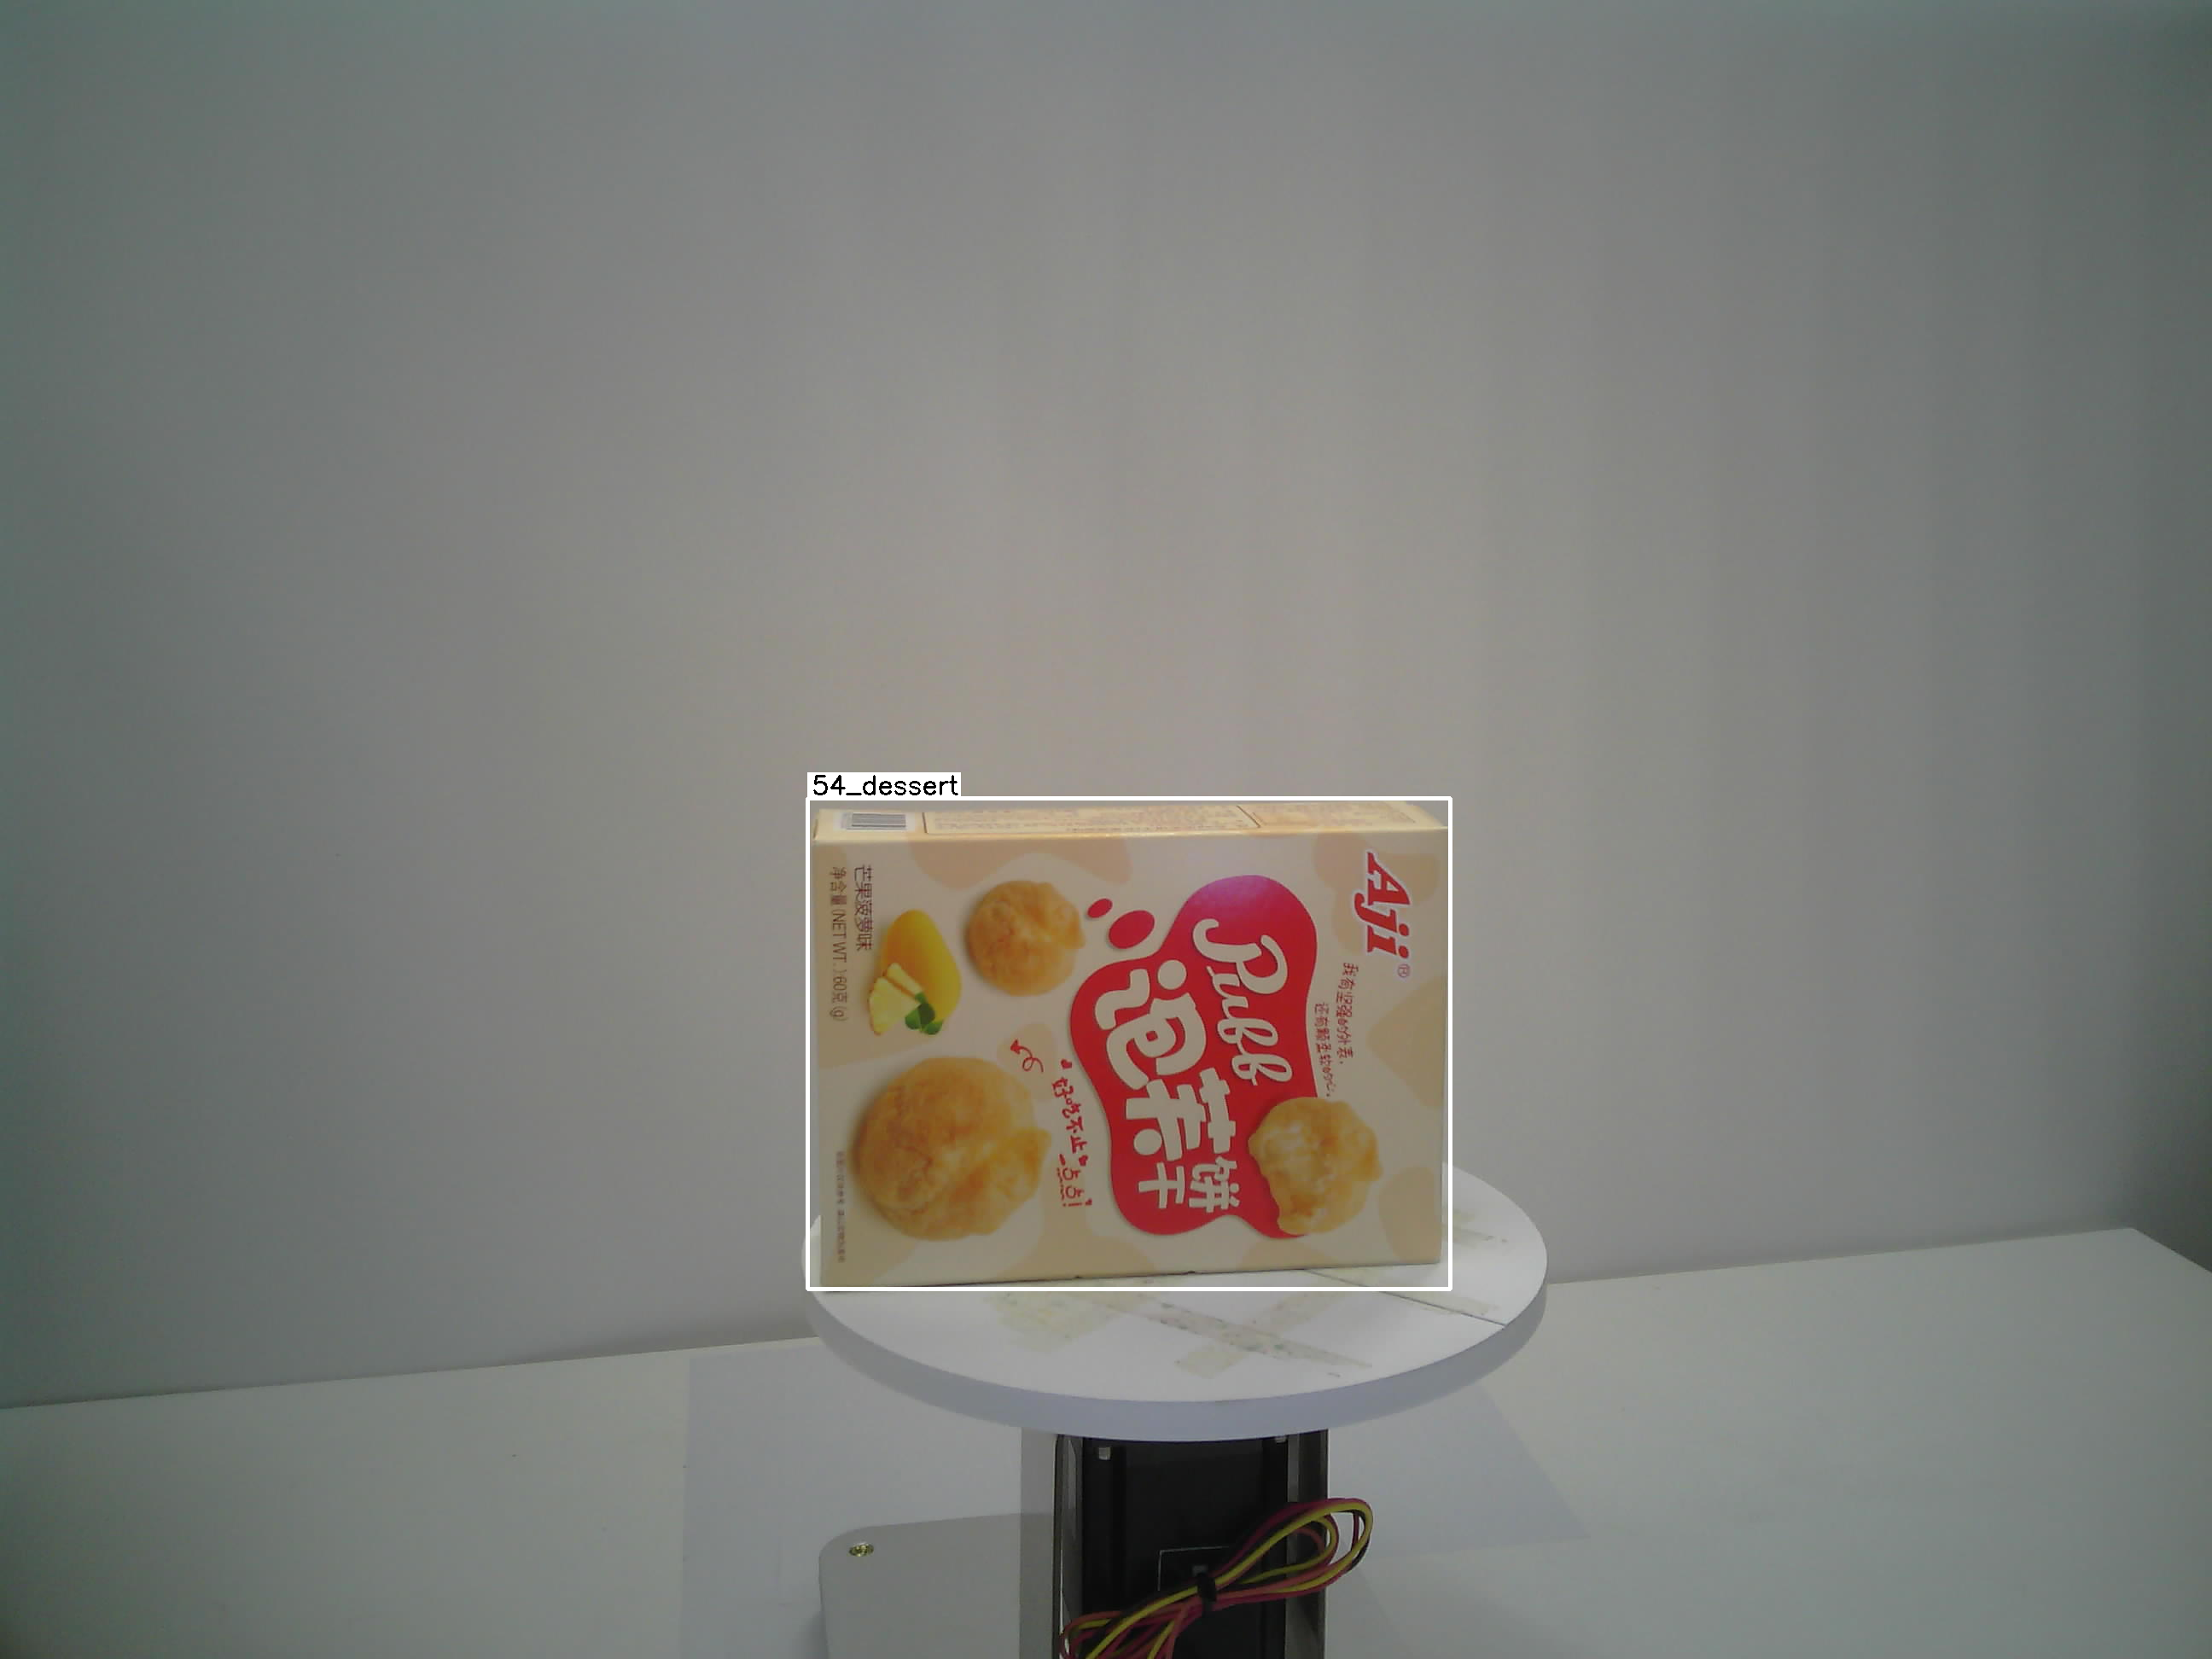

In [ ]:
display(dataset.visualize.ShowBoundingBoxes("4894375013507-back_camera3-10.jpg"))

In [ ]:
dataset.export.ExportToVoc(output_path="/content/retail-product-checkout-dataset/train2019voc")

In [ ]:
dataset1.export.ExportToVoc(output_path="/content/retail-product-checkout-dataset/test2019voc")

In [ ]:
import glob
import xml.etree.ElementTree as ET

def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

def main():
    for directory in ['train2019voc','test2019voc']:
        image_path = os.path.join(os.getcwd(), '/content/retail-product-checkout-dataset/{}'.format(directory))
        xml_df = xml_to_csv(image_path)
        xml_df.to_csv('/content/{}_labels.csv'.format(directory), index=None)
        print('Successfully converted xml to csv.')


main()

Successfully converted xml to csv.
Successfully converted xml to csv.


In [ ]:
!pip install git+https://github.com/Guillem96/efficientdet-tf
!pip install gdown
!pip install numpy==1.17.0 # PyCOCOAPI bug
!pip install tensorflow-addons==0.10.0

In [ ]:
from PIL import Image
import tensorflow as tf
import tensorflow_addons as tfa

import matplotlib.pyplot as plt

import efficientdet

In [ ]:
#@markdown EfficientDet compound scaling (Most times with D0 or D1 you'll be OK)

D = 0 #@param {type: "slider", min: 0, max: 7}

In [ ]:
model_config = efficientdet.config.EfficientDetCompudScaling(D=D)
im_size = model_config.input_size

print('Working with images of shape (H, W):', im_size)

Working with images of shape (H, W): (512, 512)


In [ ]:
data_path = Path('/content')
class_names = data_path / 'train2019_labels.names'
!cat {str(class_names)}

cat: /content/train2019_labels.names: No such file or directory


In [ ]:
# install requirements
!pip install pycocotools numpy opencv-python tqdm tensorboard tensorboardX pyyaml webcolors
!pip install torch==1.4.0
!pip install torchvision==0.5.0
 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 7.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 753.4 MB 13 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0+cu116
    Uninstalling torch-1.13.0+cu116:
      Successfully uninstalled torch-1.13.0+cu116
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.14.0+cu116 requires torch==1.13.0, but you have torch 1.4.0 which is incompatible.
torchtext 0.14.0 requires torch==1.13.0, but you have torch 1.4.0 which is incompatible.
torchaudio 0.13.0+cu116 requires torch==1.13.0, but you have torch 1.4.0 which is incompatible.
fastai 2.7.10 requires torch<1.14,>=1.7, but you have torch 1

In [ ]:
# run the simple inference script
"efficientdet-d0.pth"

'efficientdet-d0.pth'

In [ ]:
!pip install pycocotools numpy==1.16.0 opencv-python tqdm tensorboard tensorboardX pyyaml webcolors matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.16.0.zip (5.1 MB)
  Using cached opencv_python-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.5 MB)
  Using cached opencv_python-4.5.5.62-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.4 MB)
  Using cached opencv_python-4.5.4.60-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.3 MB)
  Using cached opencv_python-4.5.4.58-cp38-cp38-manylinux2014_x86_64.whl (60.3 MB)
  Using cached opencv_python-4.5.3.56-cp38-cp38-manylinux2014_x86_64.whl (49.9 MB)
  Using cached opencv_python-4.5.2.54-cp38-cp38-manylinux2014_x86_64.whl (51.0 MB)
  Using cached opencv_python-4.5.2.52-cp38-cp38-manylinux2014_x86_64.whl (51.0 MB)
  Using cached opencv_python-4.5.1.48-cp38-cp38-manylinux2014_x86_64.whl (50.4 MB)
  Using cached opencv_python-4.4.0.46-cp38-cp38-manylinux2014_x86_64.whl (49.5 MB)
  Using cached opencv_python-4.4.0.44-cp38-cp38

In [ ]:
! python train.py -c 0 -p /content/retail-product-checkout-dataset/retail_product_checkout --batch_size 8 --lr 1e-5

python3: can't open file 'train.py': [Errno 2] No such file or directory
